In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv("IHME_GBD_2019_SMOKING_AGE_1990_2019_PREV_Y2021M05D27.CSV")

In [6]:
data = data["val"] #wyciągnięcie kolumny z danymi

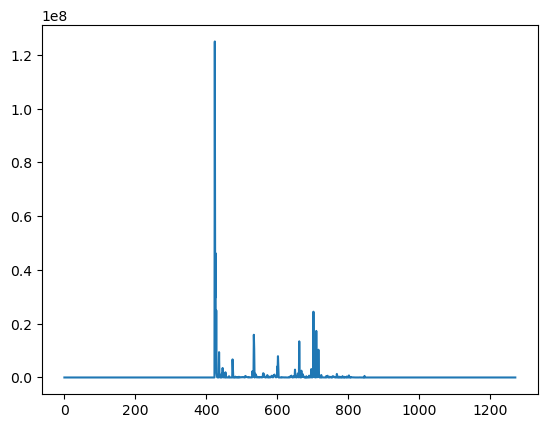

In [7]:
plt.plot(data) #stworzenie wykresu

In [8]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

In [9]:
ax1 = fig.add_subplot(2,2,1)

In [10]:
ax2 = fig.add_subplot(2,2,2)

In [11]:
ax3 = fig.add_subplot(2,2,3)

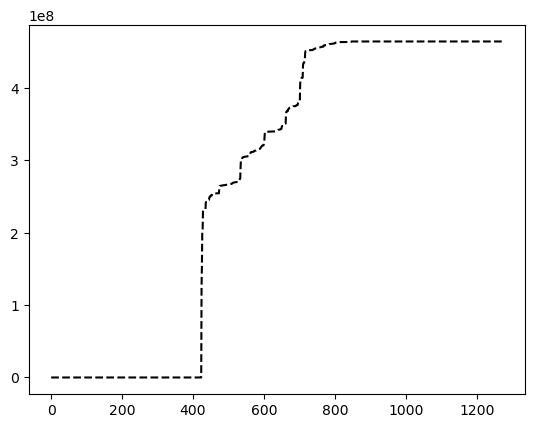

In [12]:
plt.plot(data.cumsum(), 'k--')

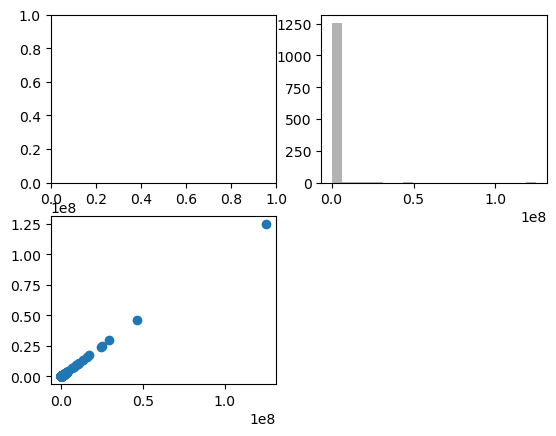

In [13]:
fig = plt.figure()
fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
plt.plot([1.5, 3.5, -2, 1.6])
_ = ax1.hist(data, bins=20, color='k', alpha=0.3)
ax2.scatter(data, data)

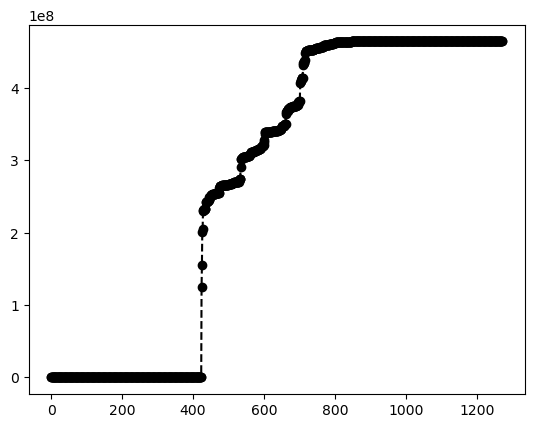

In [14]:
plt.plot(data.cumsum(), 'ko--')

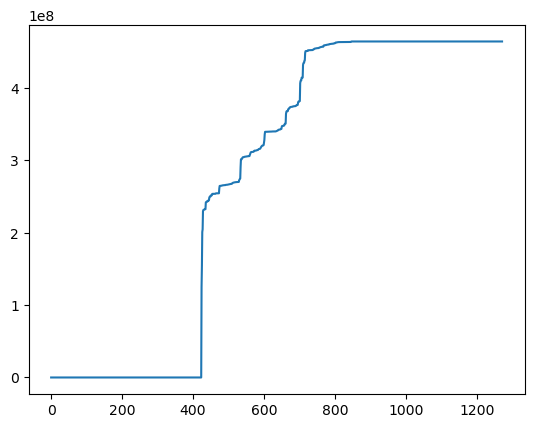

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(data.cumsum())

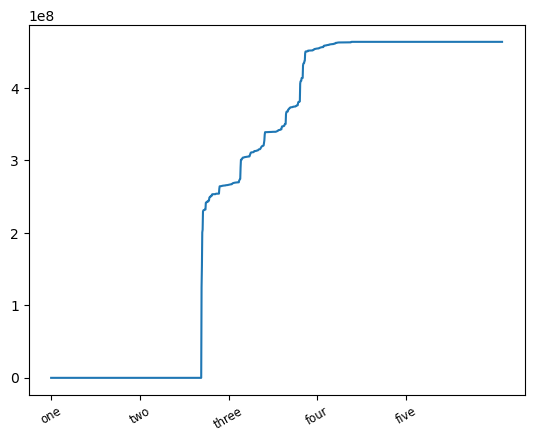

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data.cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')

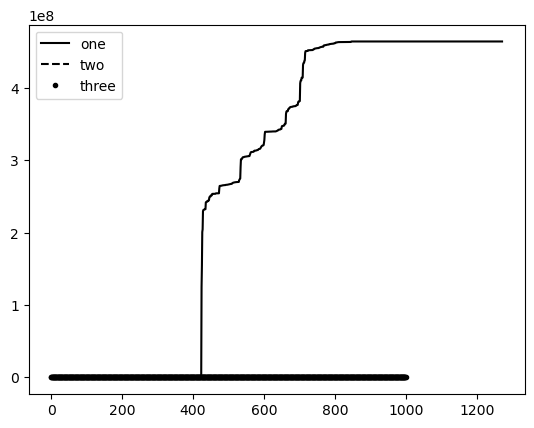

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data.cumsum(), 'k', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'k--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

<AxesSubplot:>

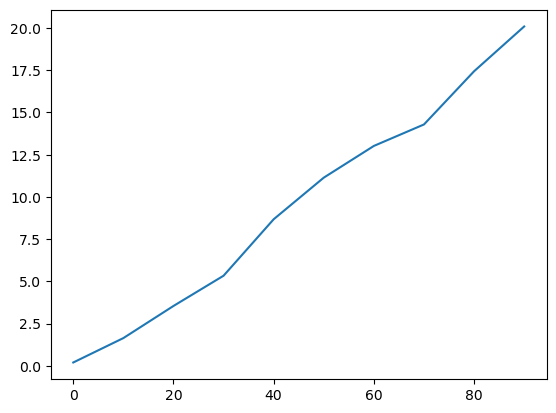

In [18]:
s = pd.Series(data.cumsum(), index=np.arange(0, 100, 10))
s.plot()

In [19]:
data = pd.read_csv("IHME_GBD_2019_SMOKING_AGE_1990_2019_PREV_Y2021M05D27.CSV")

<AxesSubplot:>

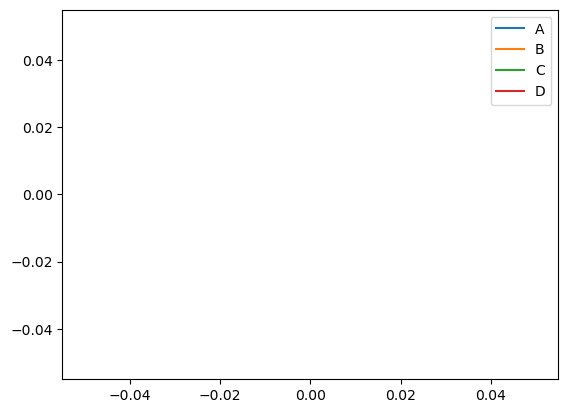

In [20]:
df = pd.DataFrame(data["val"].cumsum(0), columns=['A', 'B', 'C', 'D'], index=np.arange(0,0.001,0.1))
df.plot()

<AxesSubplot:>

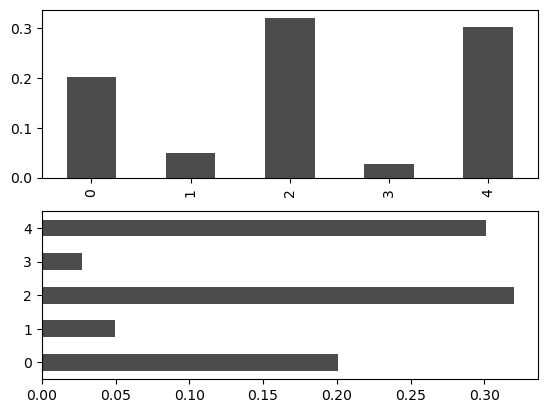

In [21]:
fig, axes = plt.subplots(2, 1) #wykres kolumnowy
colplt = data["val"].head()
colplt.plot.bar(ax=axes[0], color='k', alpha=0.7)
colplt.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [24]:
import seaborn as sns

In [25]:
data["valdivlower"] = data["val"] - data["lower"]

<AxesSubplot:xlabel='valdivlower', ylabel='lower'>

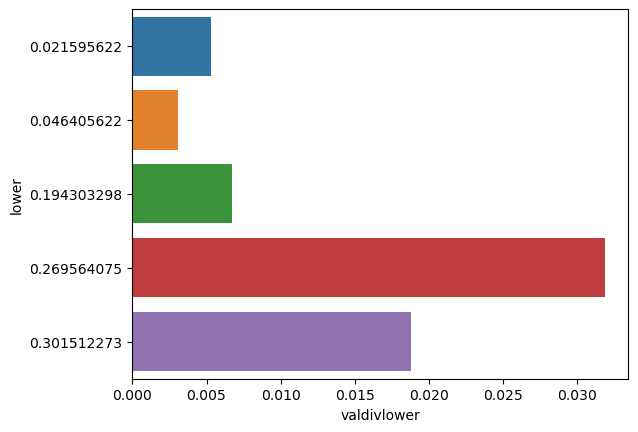

In [37]:
sns.barplot(x='valdivlower', y='lower', data=data.head(), orient='h') #wykres kolumnowy w seaborn

<AxesSubplot:xlabel='valdivlower', ylabel='lower'>

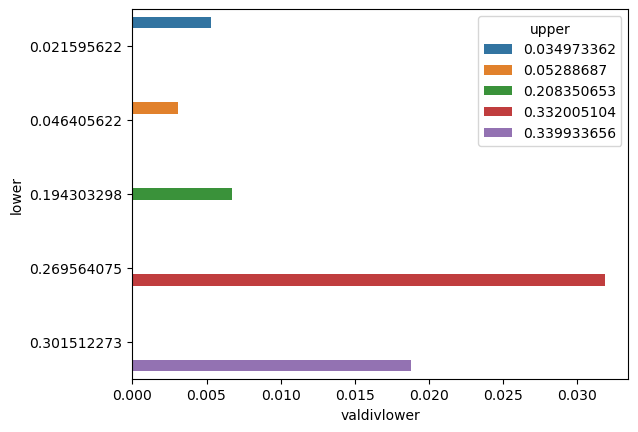

In [36]:
sns.barplot(x='valdivlower', y='lower', hue='upper', data=data.head(), orient='h')

<AxesSubplot:ylabel='Frequency'>

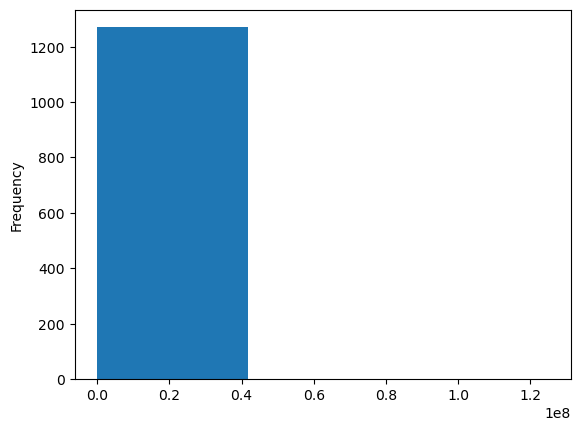

In [49]:
data['val'].plot.hist(bins=3) #histogram

<AxesSubplot:ylabel='Density'>

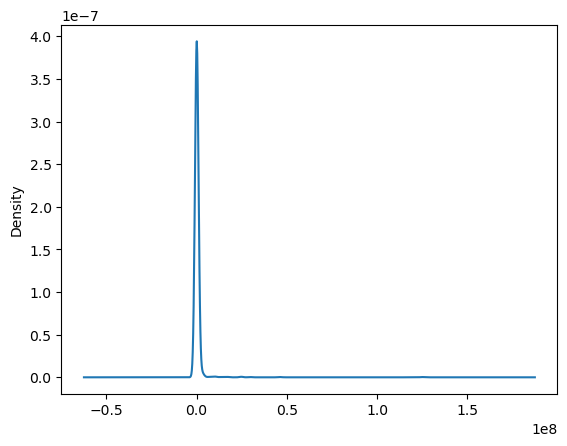

In [50]:
data['val'].plot.kde() #gęstość rozkładu

In [63]:
data1 = data[['val', 'upper']]
trans_data = np.log(data1).diff().dropna()

D:\Anaconda\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [53]:
trans_data[-5:]

1239    1.608811
1255    1.669805
1259    1.491143
1264    1.487411
1265    0.934672
Name: val, dtype: float64

Text(0.5, 1.0, 'Zaleznosc')

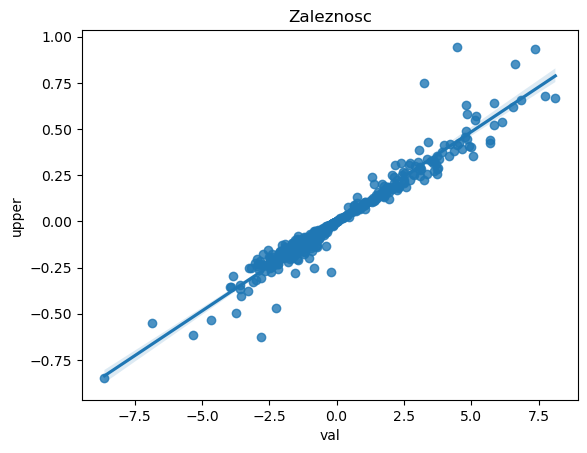

In [68]:
sns.regplot(x='val', y='upper', data=trans_data) #wykres punktowy w seaborn
plt.title('Zaleznosc')

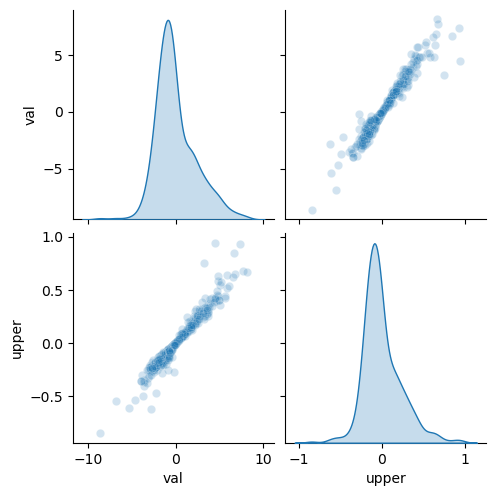

In [69]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

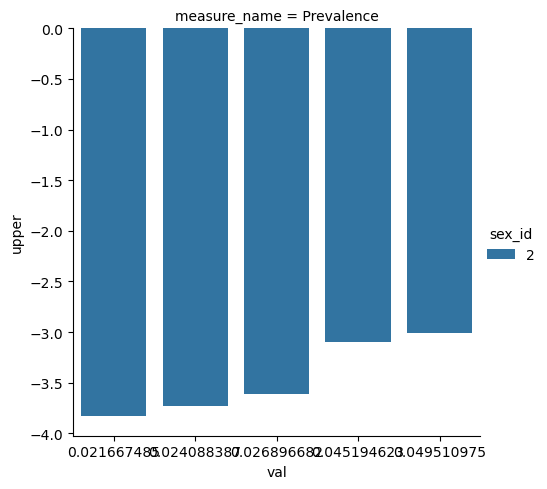

In [82]:
sns.catplot(x='val', y='upper', hue='sex_id', col='measure_name', kind='bar', data=data[data["val"] < 0.1].head()) #dane kategoryczne